# M08_T01: Classification
***Exercicis d'algoritmes d'Agrupació.***
 

## Nivell1 - 


### - Exercici 1

***Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means***



*** Importem la informació i la carreguem a un data frame***

In [49]:
#Importem les llibreries
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
%matplotlib inline


pd.options.display.max_columns=None
pd.options.display.max_rows=30

In [50]:
PubFaceThaiDf=pd.read_csv('PublicacionsFacebookThailandia.csv',sep=',',encoding='utf8',index_col=None)
PubFaceThaiDf.copy()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


#### - Exercici 1-Exploracio de dades

In [51]:
#Observem el tipus de dades
PubFaceThaiDf.dtypes

status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [52]:
# Veiem la descripció dela atributs, tots ells numerics , no hem de fer transformacions
PubFaceThaiDf.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [53]:
PubFaceThaiDf

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [54]:
#Comprovem nulls i veiem que les columnes Column1,Column2,Column3,Column4 tenen  tots els seus valors a nuls i 
# per tant no aporten res i les podem eliminar# 

PubFaceThaiDf.isna().sum()[PubFaceThaiDf.isna().sum() != 0]

Column1    7050
Column2    7050
Column3    7050
Column4    7050
dtype: int64

In [55]:
PubFaceThaiDf.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [56]:
#Observem el tipus de dades
PubFaceThaiDf.dtypes

status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

***Hi han columnes que no son categòriques, haurienm d'analitzar les columnes per veure quants valors diferents de hi han de  cadescuna per tractar de categoritzar-les***

* status_type-> Clarament es una clasificació i seguramewnt te una part molt important en l'agrupacio s'ha de passar a dada discreta
* status_published-> sembla un time-stamp , no sembla que tingui influ'encia
* status_id-> sembla un index, gairabè totes les dades son siferents

In [57]:
# Valors diferents de status_type
len(PubFaceThaiDf['status_type'].unique())

4

In [58]:
# Visualitzem els valors diferetnts
PubFaceThaiDf['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [59]:
# Valors diferents de status_published
len(PubFaceThaiDf['status_published'].unique())

6913

In [60]:
# Valors diferents de status_id 
len(PubFaceThaiDf['status_id'].unique())

6997

***Status type la podem categoritzar ja que nomes te 4 valors ,

In [61]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# converting the non-numeric to numeric values
labEnc = LabelEncoder()
PubFaceThaiDf['status_type'] = labEnc.fit_transform(PubFaceThaiDf['status_type'])

In [62]:
PubFaceThaiDf.describe()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,1.704965,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,0.942399,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


*** status_id como Status_published tenen gairabé tants valors diferents com files te el datset.***
* Status_id: sembla un identificador de la linea i no sembla que aporti massa informació
* Status_published: es un time_stamp, podriem extreure la data (( any,mes,dia) o be la hora pero entenc que de moment no es rellevant
* Finalment decideixo elimnar tambè aquests dos camps

In [63]:
PubFaceThaiDf.drop(['status_id', 'status_published'], axis=1, inplace=True)


In [64]:
PubFaceThaiDf.dtypes

status_type      int32
num_reactions    int64
num_comments     int64
num_shares       int64
num_likes        int64
num_loves        int64
num_wows         int64
num_hahas        int64
num_sads         int64
num_angrys       int64
dtype: object

#### Standaritnar dades abans d'aplicat Kmeans***

In [65]:
from sklearn.cluster import KMeans
from sklearn import preprocessing


PubFaceThaiScaler = preprocessing.MinMaxScaler()
PubFaceThaiNormalDf = PubFaceThaiScaler.fit_transform(PubFaceThaiDf)


In [66]:
PubFaceThaiNormalDf1=pd.DataFrame(PubFaceThaiNormalDf)
PubFaceThaiNormalDf1.columns=['status_type', 'num_reactions', 'num_comments', 'num_shares','num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads','num_angrys']
PubFaceThaiNormalDf1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


***Visualitzem el atributs dos a dos per tal de identificar correlacions entre atributs, podriem reduit mulicolinialitat di descartem atributs clarament correlacionats***

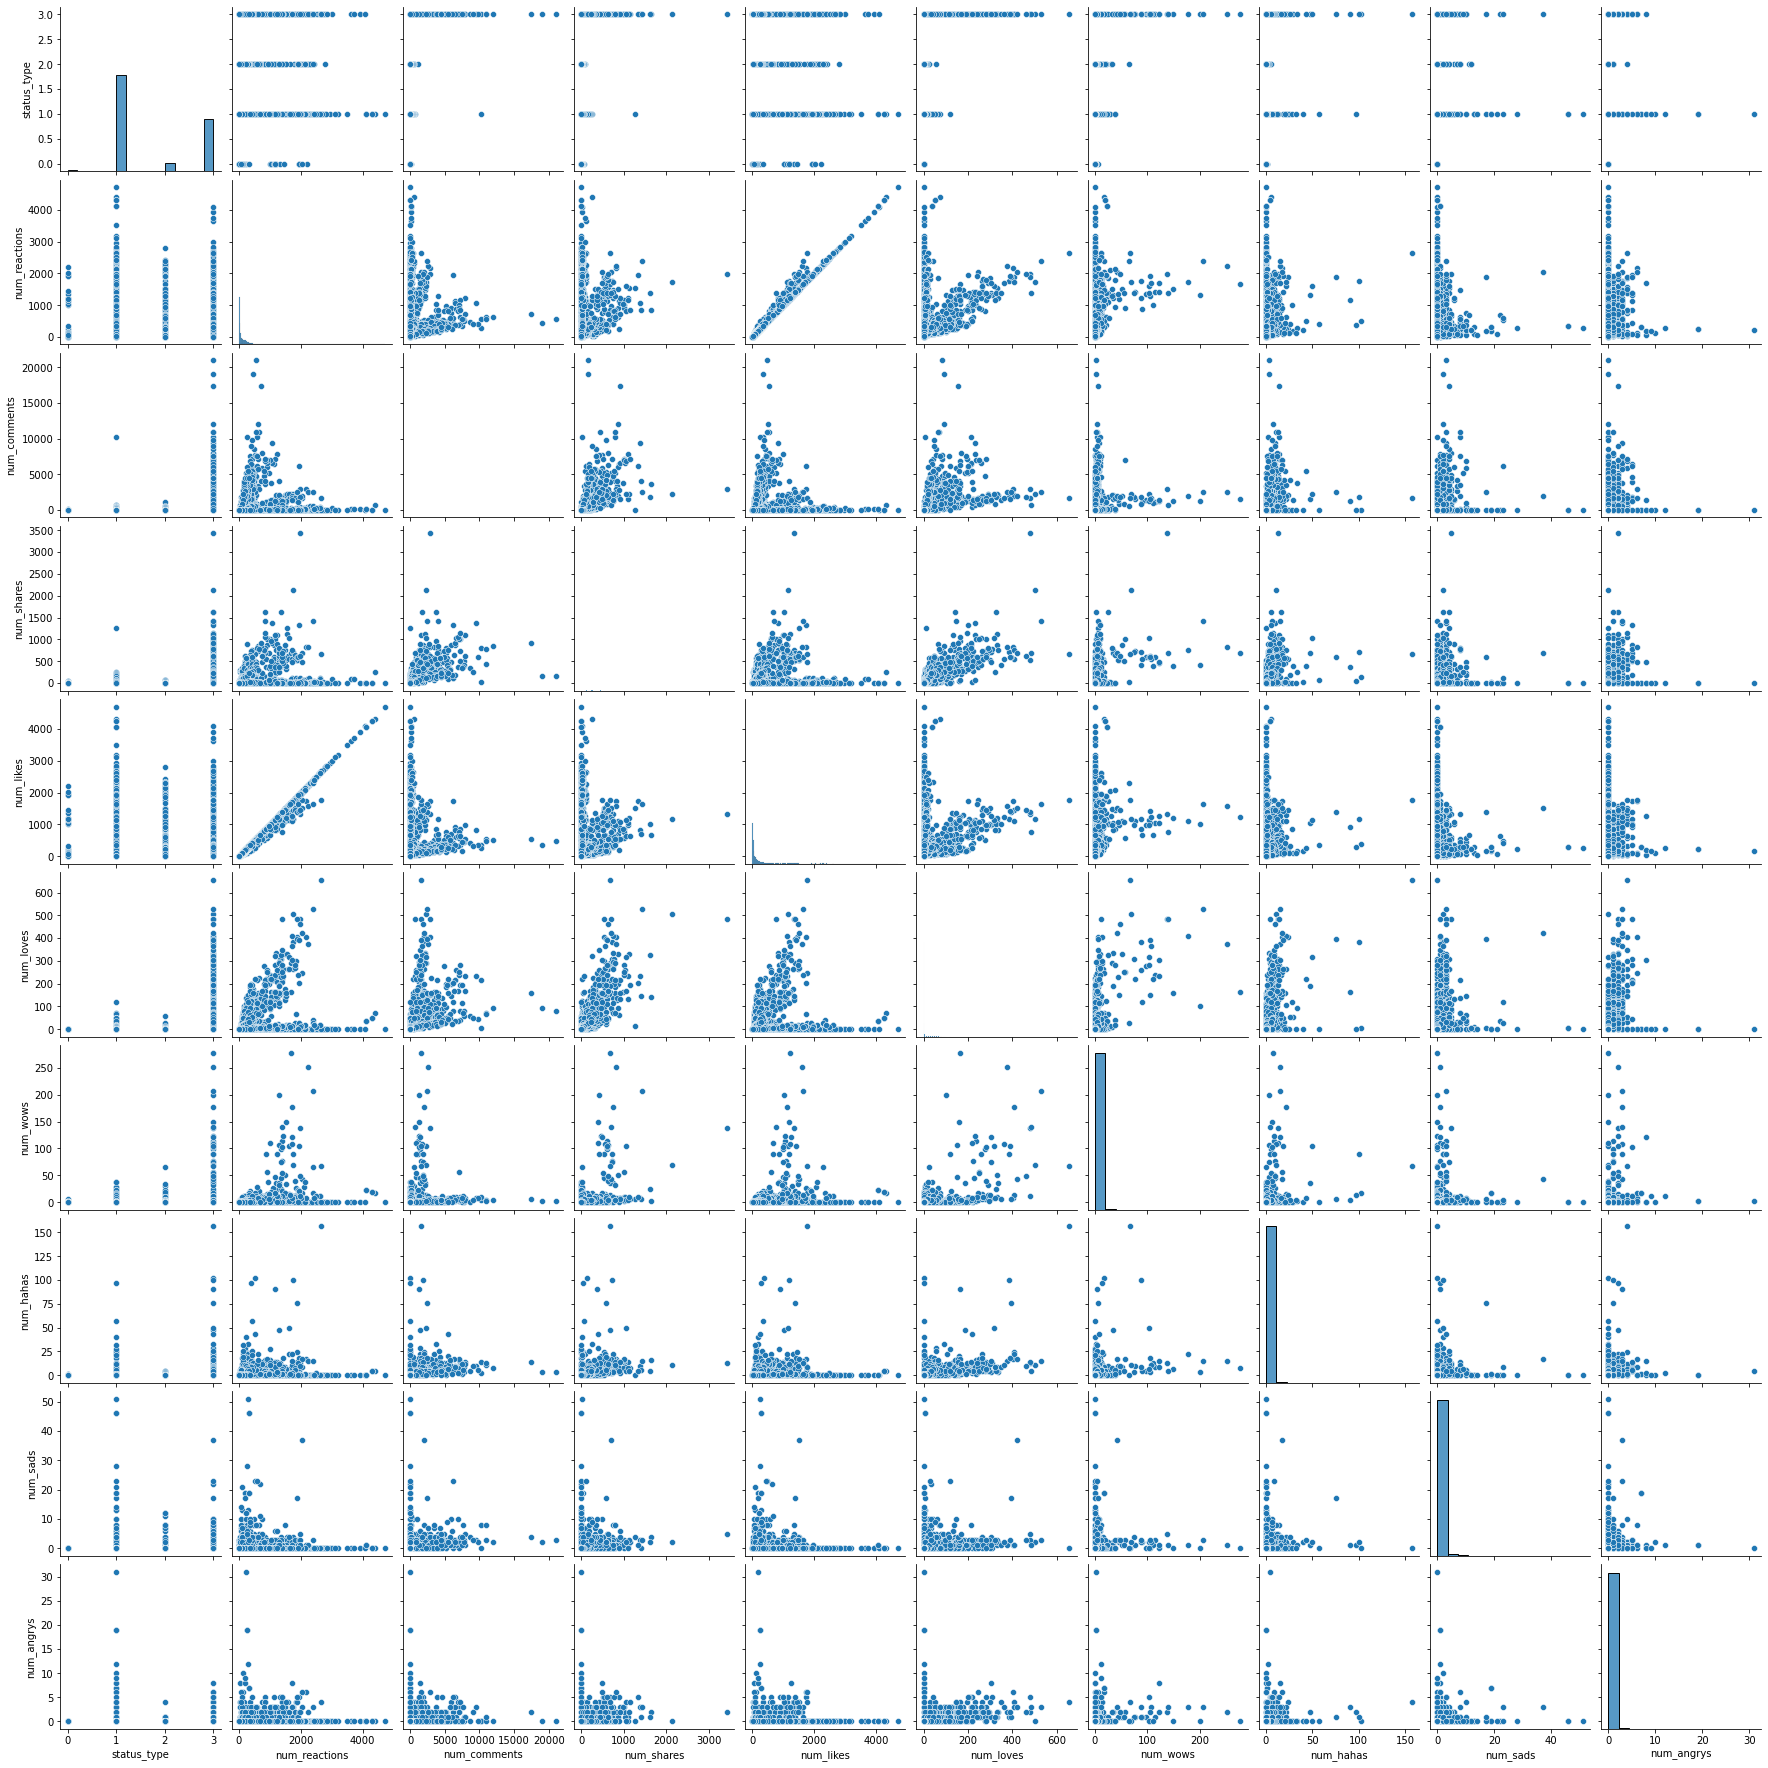

In [67]:
sns.pairplot(PubFaceThaiDf)

#### Apliquem Kmeans

***Hem de donar un valor al nombre de grups.Per ajudar en la identificació de quants grups necessiten faré servir el mètode elbow.Graficarem la suma de les distancies al quadrat dels punts al seus centres. Farem unaiteracio amb el nombre de cklusters i predrem el nombre de clusters que donin una inercia suficientment petita per tal que el criteri d'agrupacio sigui adecuada***

In [68]:
KmeansInercia = []
K = range(1,10)
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 40,}
for k in K:
    kmeanPubFaceThai = KMeans(n_clusters=k,**kmeans_kwargs)
    kmeanPubFaceThai.fit(PubFaceThaiNormalDf)
    KmeansInercia.append(kmeanPubFaceThai.inertia_)

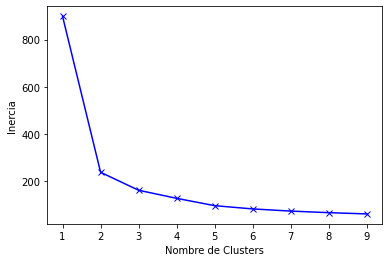

In [69]:
# Visusalitzem els resultats del elbow
plt.plot(K, KmeansInercia, 'bx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inercia')
plt.show()

***Triem K=4 como una boper classificar les dades***


In [73]:
kmeanPubFaceThai4 = KMeans(n_clusters=4).fit(PubFaceThaiNormalDf)
kmeanPubFaceThai4 = kmeanPubFaceThai4.fit(PubFaceThaiNormalDf)
centPubFaceThai4 = kmeanPubFaceThai4.cluster_centers_
print(centPubFaceThai4)


[[9.60760017e-01 3.56980806e-02 2.08303004e-02 2.18145742e-02
  3.05688636e-02 3.34849116e-02 2.40253894e-03 6.52201938e-03
  6.30107475e-03 4.67681976e-03]
 [3.29203110e-01 1.88437644e-02 6.48534102e-04 5.23444525e-04
  1.83849882e-02 1.88150929e-03 1.98733142e-03 1.12037536e-03
  2.85828617e-03 1.52826107e-03]
 [4.05291005e-01 3.73783574e-01 2.97919644e-03 4.08322207e-03
  3.72184814e-01 6.35403832e-03 1.07342697e-02 2.00181984e-03
  9.95953937e-04 2.04813108e-04]
 [1.00000000e+00 3.16742800e-01 1.07663823e-01 1.32083097e-01
  2.77584765e-01 2.31177836e-01 7.73744641e-02 5.17274657e-02
  3.20855615e-02 4.07298794e-02]]


In [74]:
# El valor de la inercia es un bon indicador de la bondat de la classificacio
printnt(kmeanPubFaceThai4.inertia_)

127.31215896781812


***Etiquetem cada fila del nostre dataframe***

In [75]:
##Etiquetem el Dataframe amb l'agrupacio resultant afegint una nova columna al final de l dataframe
GruposPubFaceThai4= kmeanPubFaceThai4.predict(PubFaceThaiNormalDf)
PubFaceThaiDf['Grupo'] = GruposPubFaceThai4


In [76]:
PubFaceThaiDf

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Grupo
0,3,529,512,262,432,92,3,1,1,0,0
1,1,150,0,0,150,0,0,0,0,0,1
2,3,227,236,57,204,21,1,1,0,0,0
3,1,111,0,0,111,0,0,0,0,0,1
4,1,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0,1
7046,1,16,0,0,14,1,0,1,0,0,1
7047,1,2,0,0,1,1,0,0,0,0,1
7048,1,351,12,22,349,2,0,0,0,0,1


***Visualitzar la classificació amb mes de 2 dimensions es complicat , per tant visualitzarem la classificacio triant 2 atributs***

In [77]:
# Visalitzem el centroide de cada grup
print(centPubFaceThai4)

[[9.60760017e-01 3.56980806e-02 2.08303004e-02 2.18145742e-02
  3.05688636e-02 3.34849116e-02 2.40253894e-03 6.52201938e-03
  6.30107475e-03 4.67681976e-03]
 [3.29203110e-01 1.88437644e-02 6.48534102e-04 5.23444525e-04
  1.83849882e-02 1.88150929e-03 1.98733142e-03 1.12037536e-03
  2.85828617e-03 1.52826107e-03]
 [4.05291005e-01 3.73783574e-01 2.97919644e-03 4.08322207e-03
  3.72184814e-01 6.35403832e-03 1.07342697e-02 2.00181984e-03
  9.95953937e-04 2.04813108e-04]
 [1.00000000e+00 3.16742800e-01 1.07663823e-01 1.32083097e-01
  2.77584765e-01 2.31177836e-01 7.73744641e-02 5.17274657e-02
  3.20855615e-02 4.07298794e-02]]


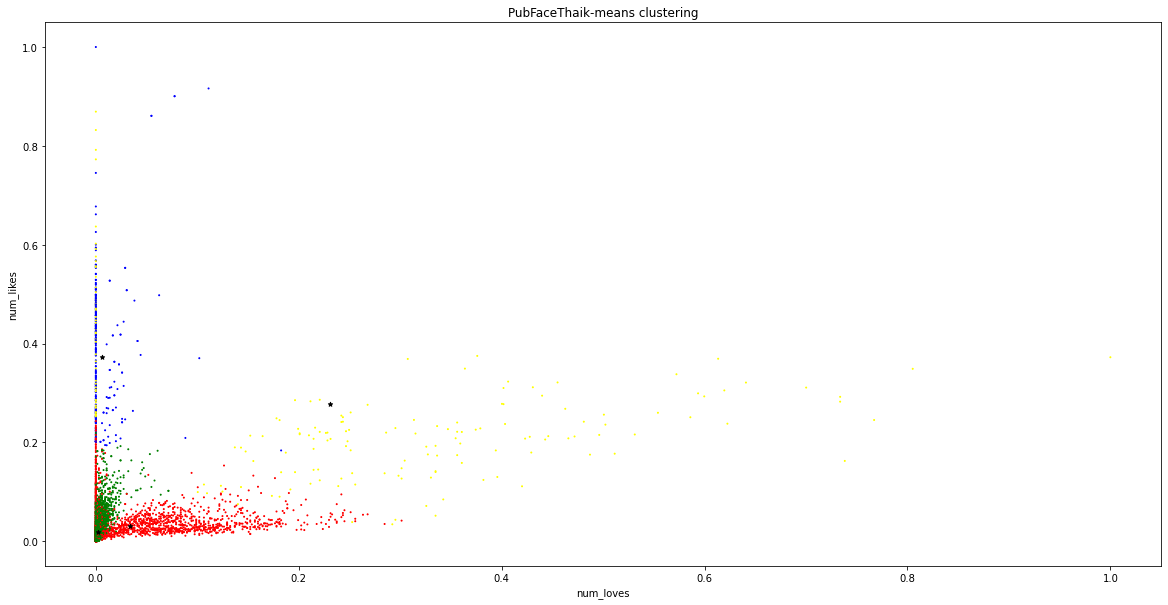

In [78]:
#%% Dibuixem  k-means clustering. num_loves vs num_likes
plt.figure(figsize=(20, 10))
atribut1 = PubFaceThaiNormalDf1.num_loves
atribut2 = PubFaceThaiNormalDf1.num_likes
colors=['red','green','blue','yellow','fuchsia']
asignarColor=[]
for row in GruposPubFaceThai4:
     asignarColor.append(colors[row])
plt.scatter(atribut1, atribut2, c=asignarColor, s=1)
plt.scatter(centPubFaceThai4[:, 5], centPubFaceThai4[:, 4], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('num_loves')
plt.ylabel('num_likes')
plt.title('PubFaceThaik-means clustering')
plt.show()

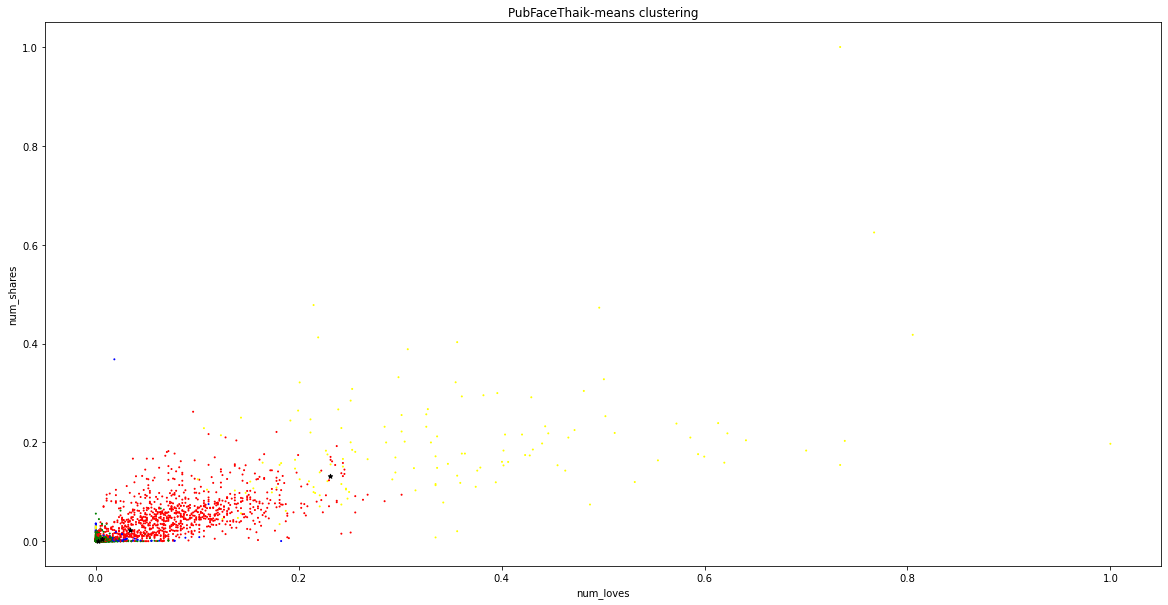

In [80]:
#%% Dibuixem  k-means clustering. num_loves vs num_likes
plt.figure(figsize=(20, 10))
atribut1 = PubFaceThaiNormalDf1.num_loves
atribut2 = PubFaceThaiNormalDf1.num_shares
colors=['red','green','blue','yellow','fuchsia']
asignarColor=[]
for row in GruposPubFaceThai4:
     asignarColor.append(colors[row])
plt.scatter(atribut1, atribut2, c=asignarColor, s=1)
plt.scatter(centPubFaceThai4[:, 5], centPubFaceThai4[:, 3], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('num_loves')
plt.ylabel('num_shares')
plt.title('PubFaceThaik-means clustering')
plt.show()

***Alternativament podriem haver fet una pca per reduir el nombre de dimensions el que ens permetria optimizar el procès i obtenir una millor visualització fem servir un PCA ***

### Exercici 2
***Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.***

***Primer tornem a netejar les dades , categoritzar-les i normalitzarles***

In [81]:
PubFaceThaiJerDf=pd.read_csv('PublicacionsFacebookThailandia.csv',sep=',',encoding='utf8',index_col=None)
PubFaceThaiJerDf.drop(['Column1', 'Column2', 'Column3', 'Column4','status_id', 'status_published'], axis=1, inplace=True)


In [82]:
valsStType = PubFaceThaiJerDf['status_type']

# importen enconder
from sklearn.preprocessing import LabelEncoder

# convertim de no numeric a numeric
labEnc = LabelEncoder()
PubFaceThaiJerDf['status_type'] = labEnc.fit_transform(PubFaceThaiJerDf['status_type'])
valsStType = labEnc.transform(valsStType)

In [83]:
from sklearn.preprocessing import normalize
PubFaceThaiNormDf = normalize(PubFaceThaiJerDf)
PubFaceThaiNormDf = pd.DataFrame(PubFaceThaiNormDf, columns=PubFaceThaiJerDf.columns)
PubFaceThaiNormDf.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.003342,0.589331,0.570392,0.291880,0.481268,0.102492,0.003342,0.001114,0.001114,0.0
1,0.004714,0.707099,0.000000,0.000000,0.707099,0.000000,0.000000,0.000000,0.000000,0.0
2,0.007681,0.581207,0.604251,0.145942,0.522319,0.053768,0.002560,0.002560,0.000000,0.0
3,0.006370,0.707092,0.000000,0.000000,0.707092,0.000000,0.000000,0.000000,0.000000,0.0
4,0.003389,0.721860,0.000000,0.000000,0.691359,0.030501,0.000000,0.000000,0.000000,0.0


***Fem servit un dendograma per determinar el noombre d'agrupacions optim***

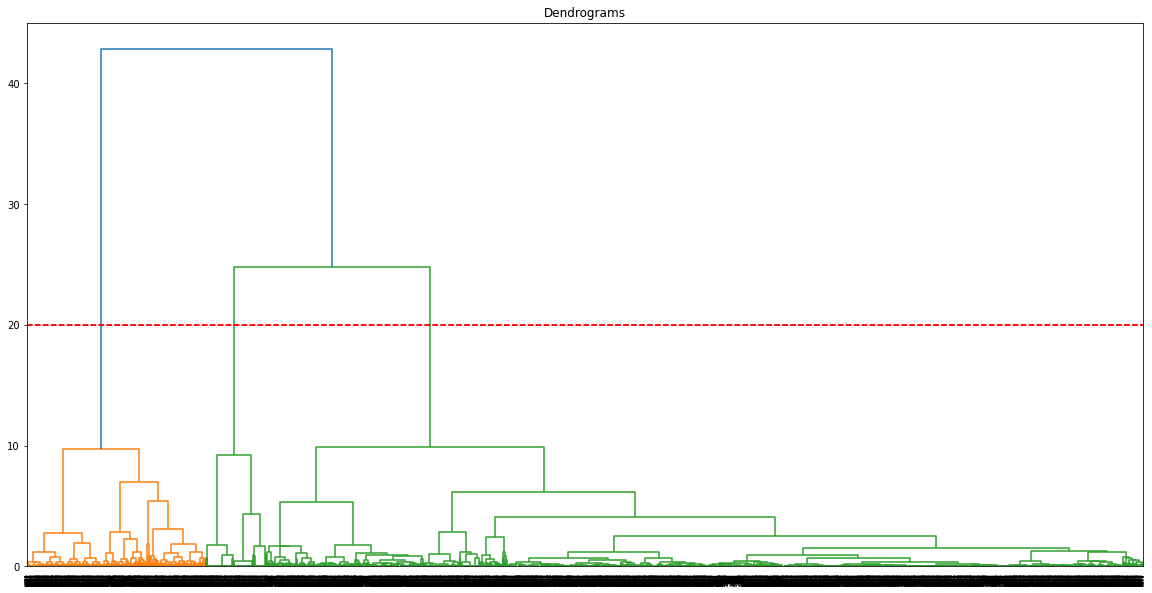

In [84]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(PubFaceThaiNormDf, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')


***Podem provar agafant y=20 i veiem que la linea horitzontal talla 3 linees verticals , podem provar 3 clusters***

In [85]:
from sklearn.cluster import AgglomerativeClustering
PubFaceThacluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
PubFaceThacluster.fit_predict(PubFaceThaiNormDf)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

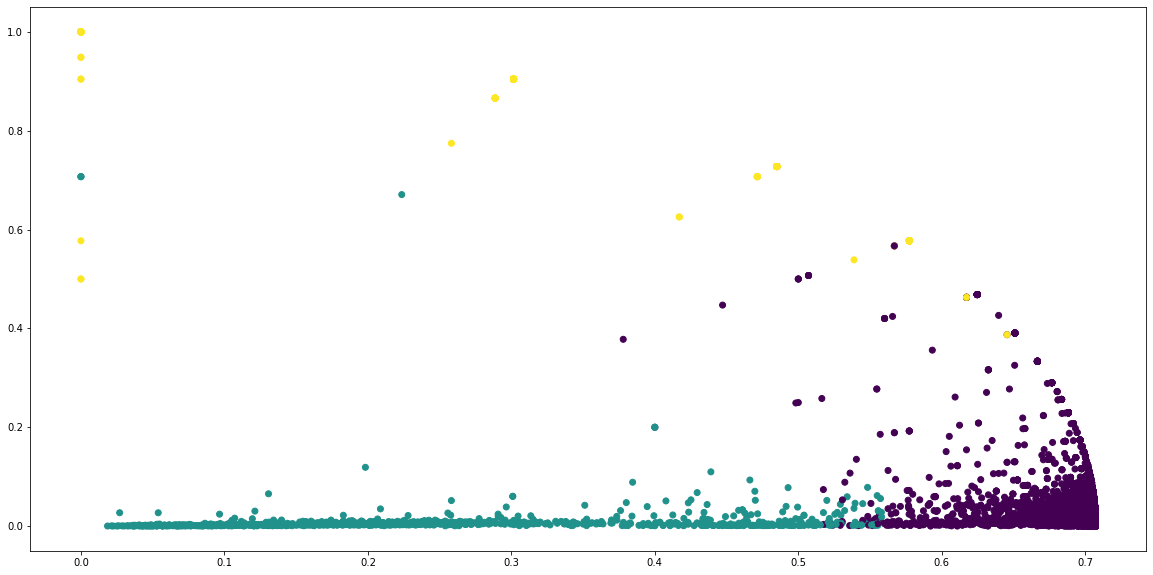

In [86]:
plt.figure(figsize=(20, 10))  
plt.scatter(PubFaceThaiNormDf['num_likes'], PubFaceThaiNormDf['status_type'], c=PubFaceThacluster.labels_) 

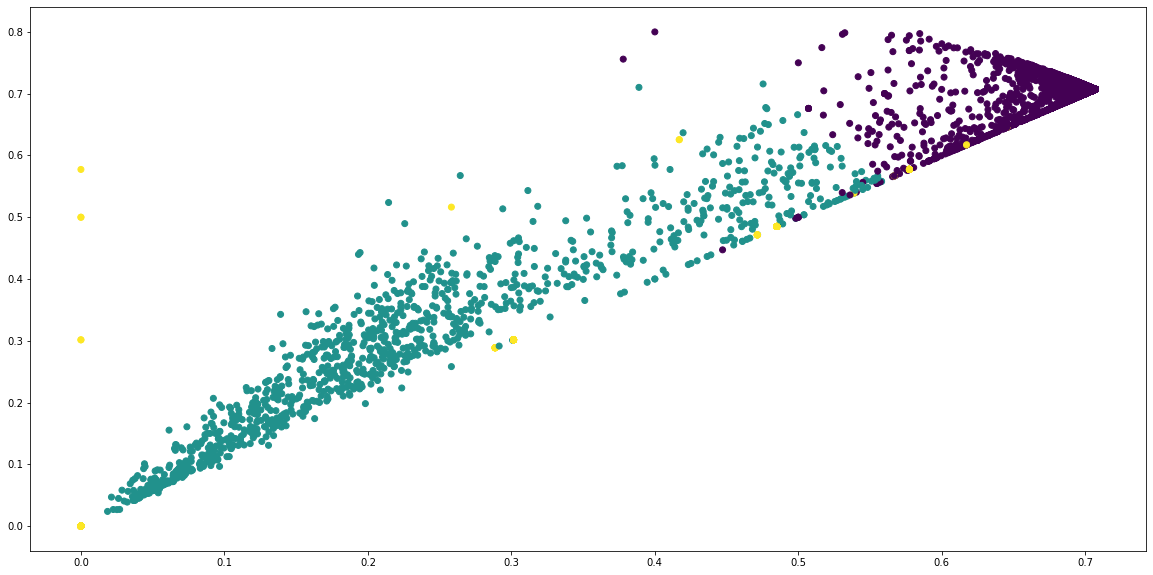

In [87]:
plt.figure(figsize=(20, 10))  
plt.scatter(PubFaceThaiNormDf['num_likes'], PubFaceThaiNormDf['num_reactions'], c=PubFaceThacluster.labels_) 

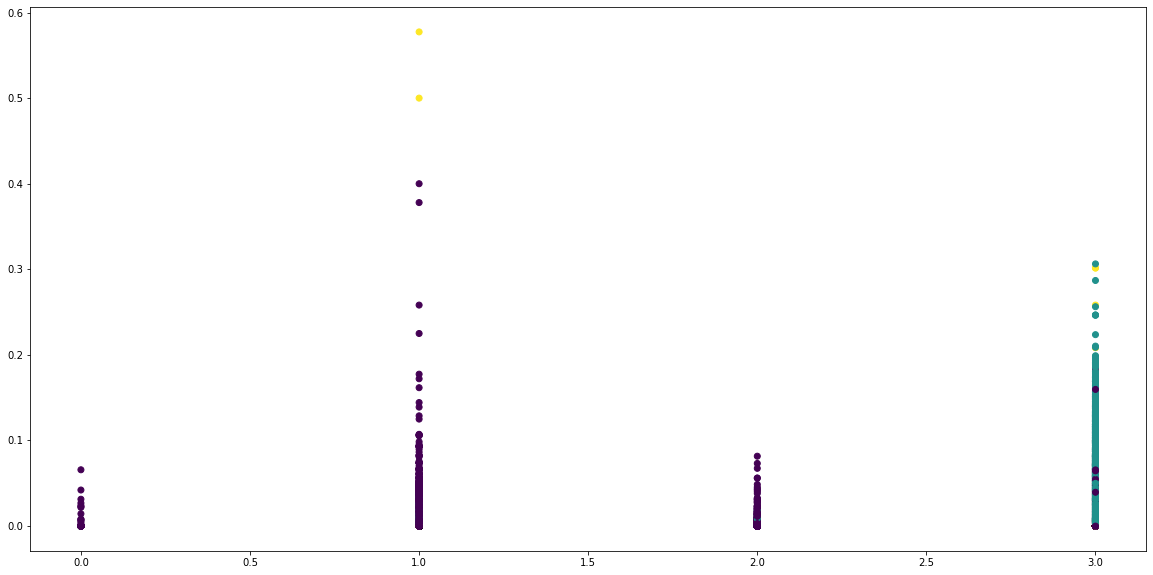

In [88]:
plt.figure(figsize=(20, 10))  
plt.scatter(PubFaceThaiDf['status_type'], PubFaceThaiNormDf['num_loves'], c=PubFaceThacluster.labels_) 

### Exercici 3
***Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.***

* Anem a evaluar el K-means sque hem fet al punt 1 amb silhouette

In [89]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [90]:
In [17]: # A list holds the silhouette coefficients for each k
PubFaceThaiSilhouetteCoef= []
for k in range(2, 11):
    kmeanPubFaceThai = KMeans(n_clusters=k,**kmeans_kwargs)
    kmeanPubFaceThai.fit(PubFaceThaiNormalDf)
    scorePubFaceThai = silhouette_score(PubFaceThaiNormalDf, kmeanPubFaceThai.labels_)
    PubFaceThaiSilhouetteCoef.append(scorePubFaceThai)

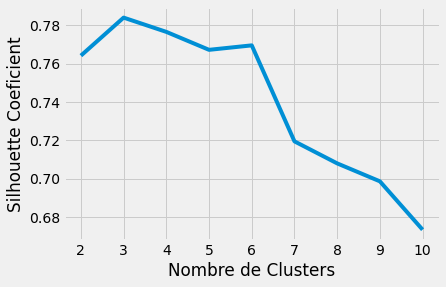

In [91]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), PubFaceThaiSilhouetteCoef)
plt.xticks(range(2, 11))
plt.xlabel("Nombre de Clusters")
plt.ylabel("Silhouette Coeficient")
plt.show()

***El mètode Silhouette  dona valor optim amb 3 clusters***

In [92]:
kmeanPubFaceThai3 = KMeans(n_clusters=3,**kmeans_kwargs)
kmeanPubFaceThai3.fit(PubFaceThaiNormalDf)
centPubFaceThai3 = kmeanPubFaceThai3.cluster_centers_
print(centPubFaceThai4)

[[9.60760017e-01 3.56980806e-02 2.08303004e-02 2.18145742e-02
  3.05688636e-02 3.34849116e-02 2.40253894e-03 6.52201938e-03
  6.30107475e-03 4.67681976e-03]
 [3.29203110e-01 1.88437644e-02 6.48534102e-04 5.23444525e-04
  1.83849882e-02 1.88150929e-03 1.98733142e-03 1.12037536e-03
  2.85828617e-03 1.52826107e-03]
 [4.05291005e-01 3.73783574e-01 2.97919644e-03 4.08322207e-03
  3.72184814e-01 6.35403832e-03 1.07342697e-02 2.00181984e-03
  9.95953937e-04 2.04813108e-04]
 [1.00000000e+00 3.16742800e-01 1.07663823e-01 1.32083097e-01
  2.77584765e-01 2.31177836e-01 7.73744641e-02 5.17274657e-02
  3.20855615e-02 4.07298794e-02]]


In [93]:
##Etiquetamos nuestro dataframe.
GruposPubFaceThai3= kmeanPubFaceThai3.predict(PubFaceThaiNormalDf)
PubFaceThaiDf['Grupo'] = GruposPubFaceThai3

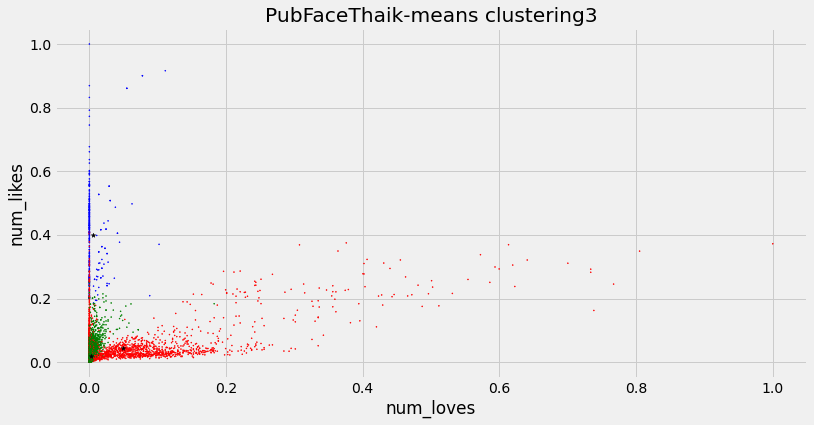

In [94]:
#%% Dibuixem  k-means clustering.
plt.figure(figsize=(12, 6))
atribut1 = PubFaceThaiNormalDf1.num_loves
atribut2 = PubFaceThaiNormalDf1.num_likes
colors=['red','green','blue','yellow','fuchsia']
asignarColor=[]
for row in GruposPubFaceThai3:
     asignarColor.append(colors[row])
plt.scatter(atribut1, atribut2, c=asignarColor, s=1)
plt.scatter(centPubFaceThai3[:, 5], centPubFaceThai3[:, 4], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('num_loves')
plt.ylabel('num_likes')
plt.title('PubFaceThaik-means clustering3')
plt.show()

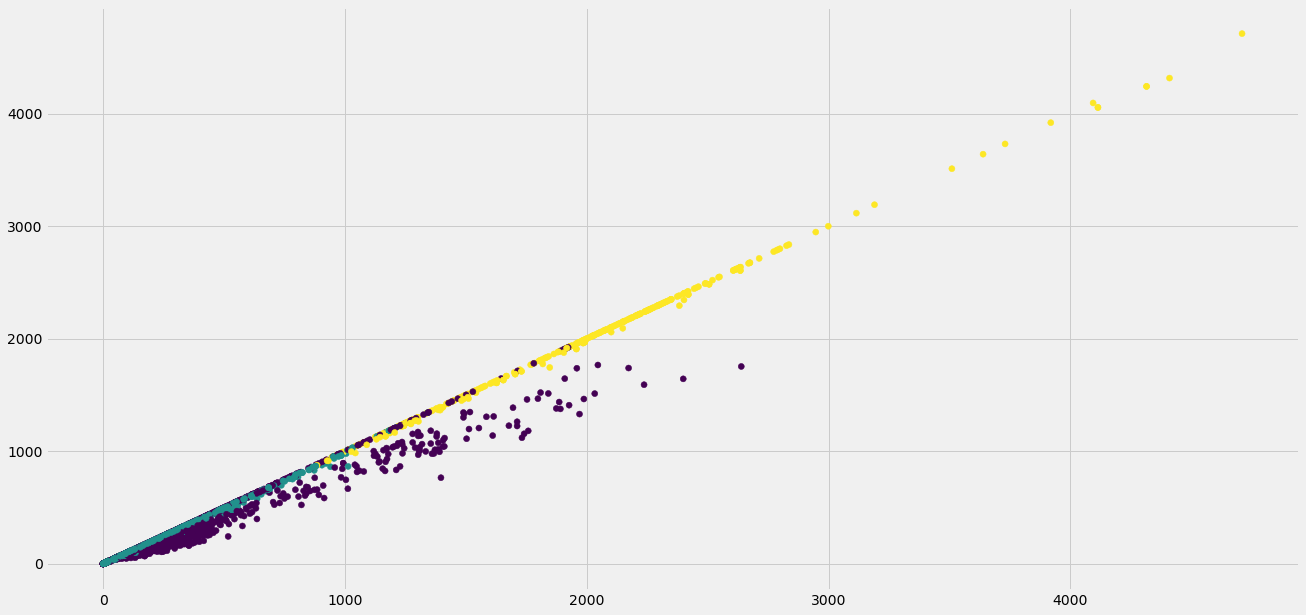

In [95]:
plt.figure(figsize=(20, 10))  
plt.scatter(PubFaceThaiDf['num_reactions'], PubFaceThaiDf['num_likes'], c=PubFaceThaiDf.Grupo) 